In [3]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [5]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.482783
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.430821
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.339879
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.352868
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.326888


In [6]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-17,108.000000,107.260002,107.269997,107.449997,6370200.0,107.449997
2019-05-20,108.129997,107.139999,107.440002,107.330002,6565300.0,107.330002
2019-05-21,107.540001,106.290001,107.470001,106.370003,5226400.0,106.370003
2019-05-22,107.050003,105.940002,106.089996,106.720001,4889700.0,106.720001
2019-05-23,107.029999,105.889999,106.680000,106.760002,6175600.0,106.760002


In [8]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift()) - 1
print (PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008015
1995-01-05   -0.014142
1995-01-06    0.002049
1995-01-09   -0.004089
1995-01-10    0.012320
1995-01-11   -0.002028
1995-01-12    0.010162
1995-01-13    0.029230
1995-01-16    0.008000
1995-01-17    0.003968
1995-01-18   -0.021739
1995-01-19   -0.004041
1995-01-20   -0.004057
1995-01-23    0.010184
1995-01-24   -0.002016
1995-01-25    0.014141
1995-01-26    0.003984
1995-01-27    0.027778
1995-01-30    0.015444
1995-01-31   -0.009505
1995-02-01   -0.019194
1995-02-02    0.007828
1995-02-03    0.009708
1995-02-06    0.023077
1995-02-07   -0.001879
1995-02-08   -0.011300
1995-02-09   -0.001905
1995-02-10   -0.001908
1995-02-13    0.007648
                ...   
2019-04-11    0.000956
2019-04-12    0.002959
2019-04-15    0.006377
2019-04-16    0.006526
2019-04-17    0.001665
2019-04-18    0.001890
2019-04-22   -0.000377
2019-04-23   -0.026884
2019-04-24    0.005138
2019-04-25   -0.003954
2019-04-26    0.024981
2019-04-29   -0.010202
2019-0

In [10]:
# Plotting onto a graph below

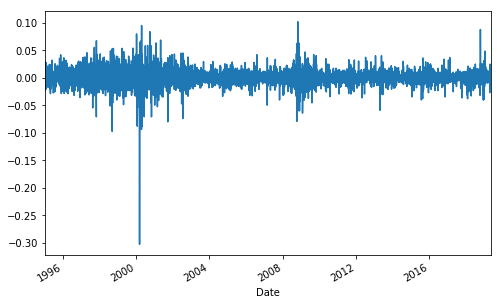

In [11]:
PG['simple_return'].plot(figsize=(8, 5))

In [13]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0005556939226229664

In [14]:
avg_returns_a = PG['simple_return'].mean() * 252
avg_returns_a

0.14003486850098754

In [19]:
print (str(round(avg_returns_a,5) * 100) + ' %')

14.002999999999998 %


In [20]:
# Calculating rate of return of an equity portfolio 

In [22]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [23]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [24]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6141 entries, 1995-01-03 to 2019-05-23
Data columns (total 4 columns):
PG      6141 non-null float64
MSFT    6141 non-null float64
F       6141 non-null float64
GE      6141 non-null float64
dtypes: float64(4)
memory usage: 239.9 KB


In [25]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.482783,2.708275,3.357222,2.740008
1995-01-04,6.430821,2.727962,3.447551,2.740008
1995-01-05,6.339879,2.682966,3.417441,2.746723
1995-01-06,6.352868,2.727962,3.417441,2.733292
1995-01-09,6.326888,2.711088,3.477660,2.706429


In [26]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-05-17,107.449997,128.070007,10.29,10.00
2019-05-20,107.330002,126.220001,10.28,9.88
2019-05-21,106.370003,126.900002,10.24,9.96
2019-05-22,106.720001,127.669998,9.97,9.90
2019-05-23,106.760002,126.180000,9.85,9.56


In [27]:
mydata.iloc[0]

PG      6.482783
MSFT    2.708275
F       3.357222
GE      2.740008
Name: 1995-01-03 00:00:00, dtype: float64

In [30]:
# Step 1: Normalization to 100 
# Forces the beginning points for all stocks to start at the same point on the y-axis

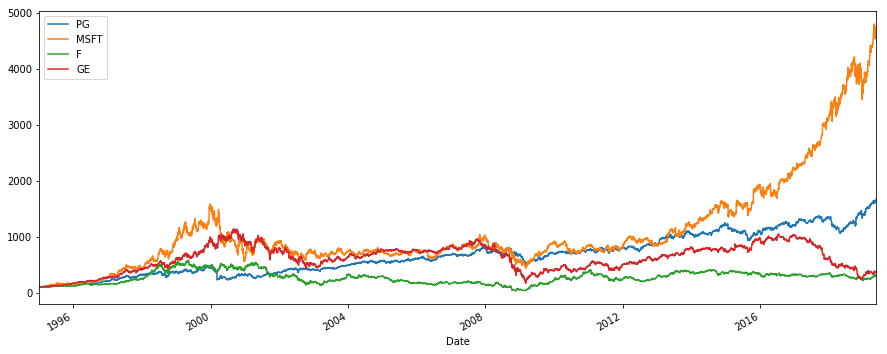

In [29]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6))

In [32]:
# Step 2: Portfolio return calculation

In [33]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004089,-0.006186,0.017621,-0.009828


In [35]:
weights = np.array([.25, .25, .25, .25])

In [37]:
np.dot(returns, weights)

array([        nan,  0.0065399 , -0.00922985, ...,  0.00016229,
       -0.00575829, -0.01441883])

In [ ]:
# Note: np.dot() calculates vector or matrix products

In [38]:
annual_returns = returns.mean() * 252
annual_returns

PG      0.140035
MSFT    0.207130
F       0.122691
GE      0.096679
dtype: float64

In [39]:
np.dot(annual_returns, weights)

0.14163372866844792

In [40]:
# Note: The following line of code reformats the above into a percentage

In [42]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

14.163 %
